In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('https://github.com/Nine587403/DataScience2/blob/main/Churn_Modelling.csv?raw=true')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1396,1397,15748797,Dale,636,Spain,Female,33,0,0.00,1,1,0,92277.47,1
4218,4219,15782418,Ku,589,Germany,Female,19,9,83495.11,1,1,1,143022.31,1
8761,8762,15738088,Parkin,634,Spain,Male,63,10,0.00,2,1,0,30772.86,1
2648,2649,15644962,Connolly,745,France,Male,21,4,137910.45,1,1,1,177235.23,0
3452,3453,15722965,Yefimova,757,France,Male,57,3,89079.41,1,1,1,53179.21,1
1241,1242,15760774,Hargraves,519,France,Female,21,1,146329.57,2,1,1,194867.27,0
1251,1252,15814930,McGregor,588,Germany,Female,40,10,125534.51,1,1,0,121504.18,1
3561,3562,15614302,Crotty,699,Germany,Female,31,10,125837.86,2,1,0,189392.66,0
7614,7615,15725002,Smith,749,France,Male,37,7,0.00,2,1,0,20306.79,0
4007,4008,15645496,Seleznyova,648,France,Female,43,7,139972.18,1,1,0,143668.58,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


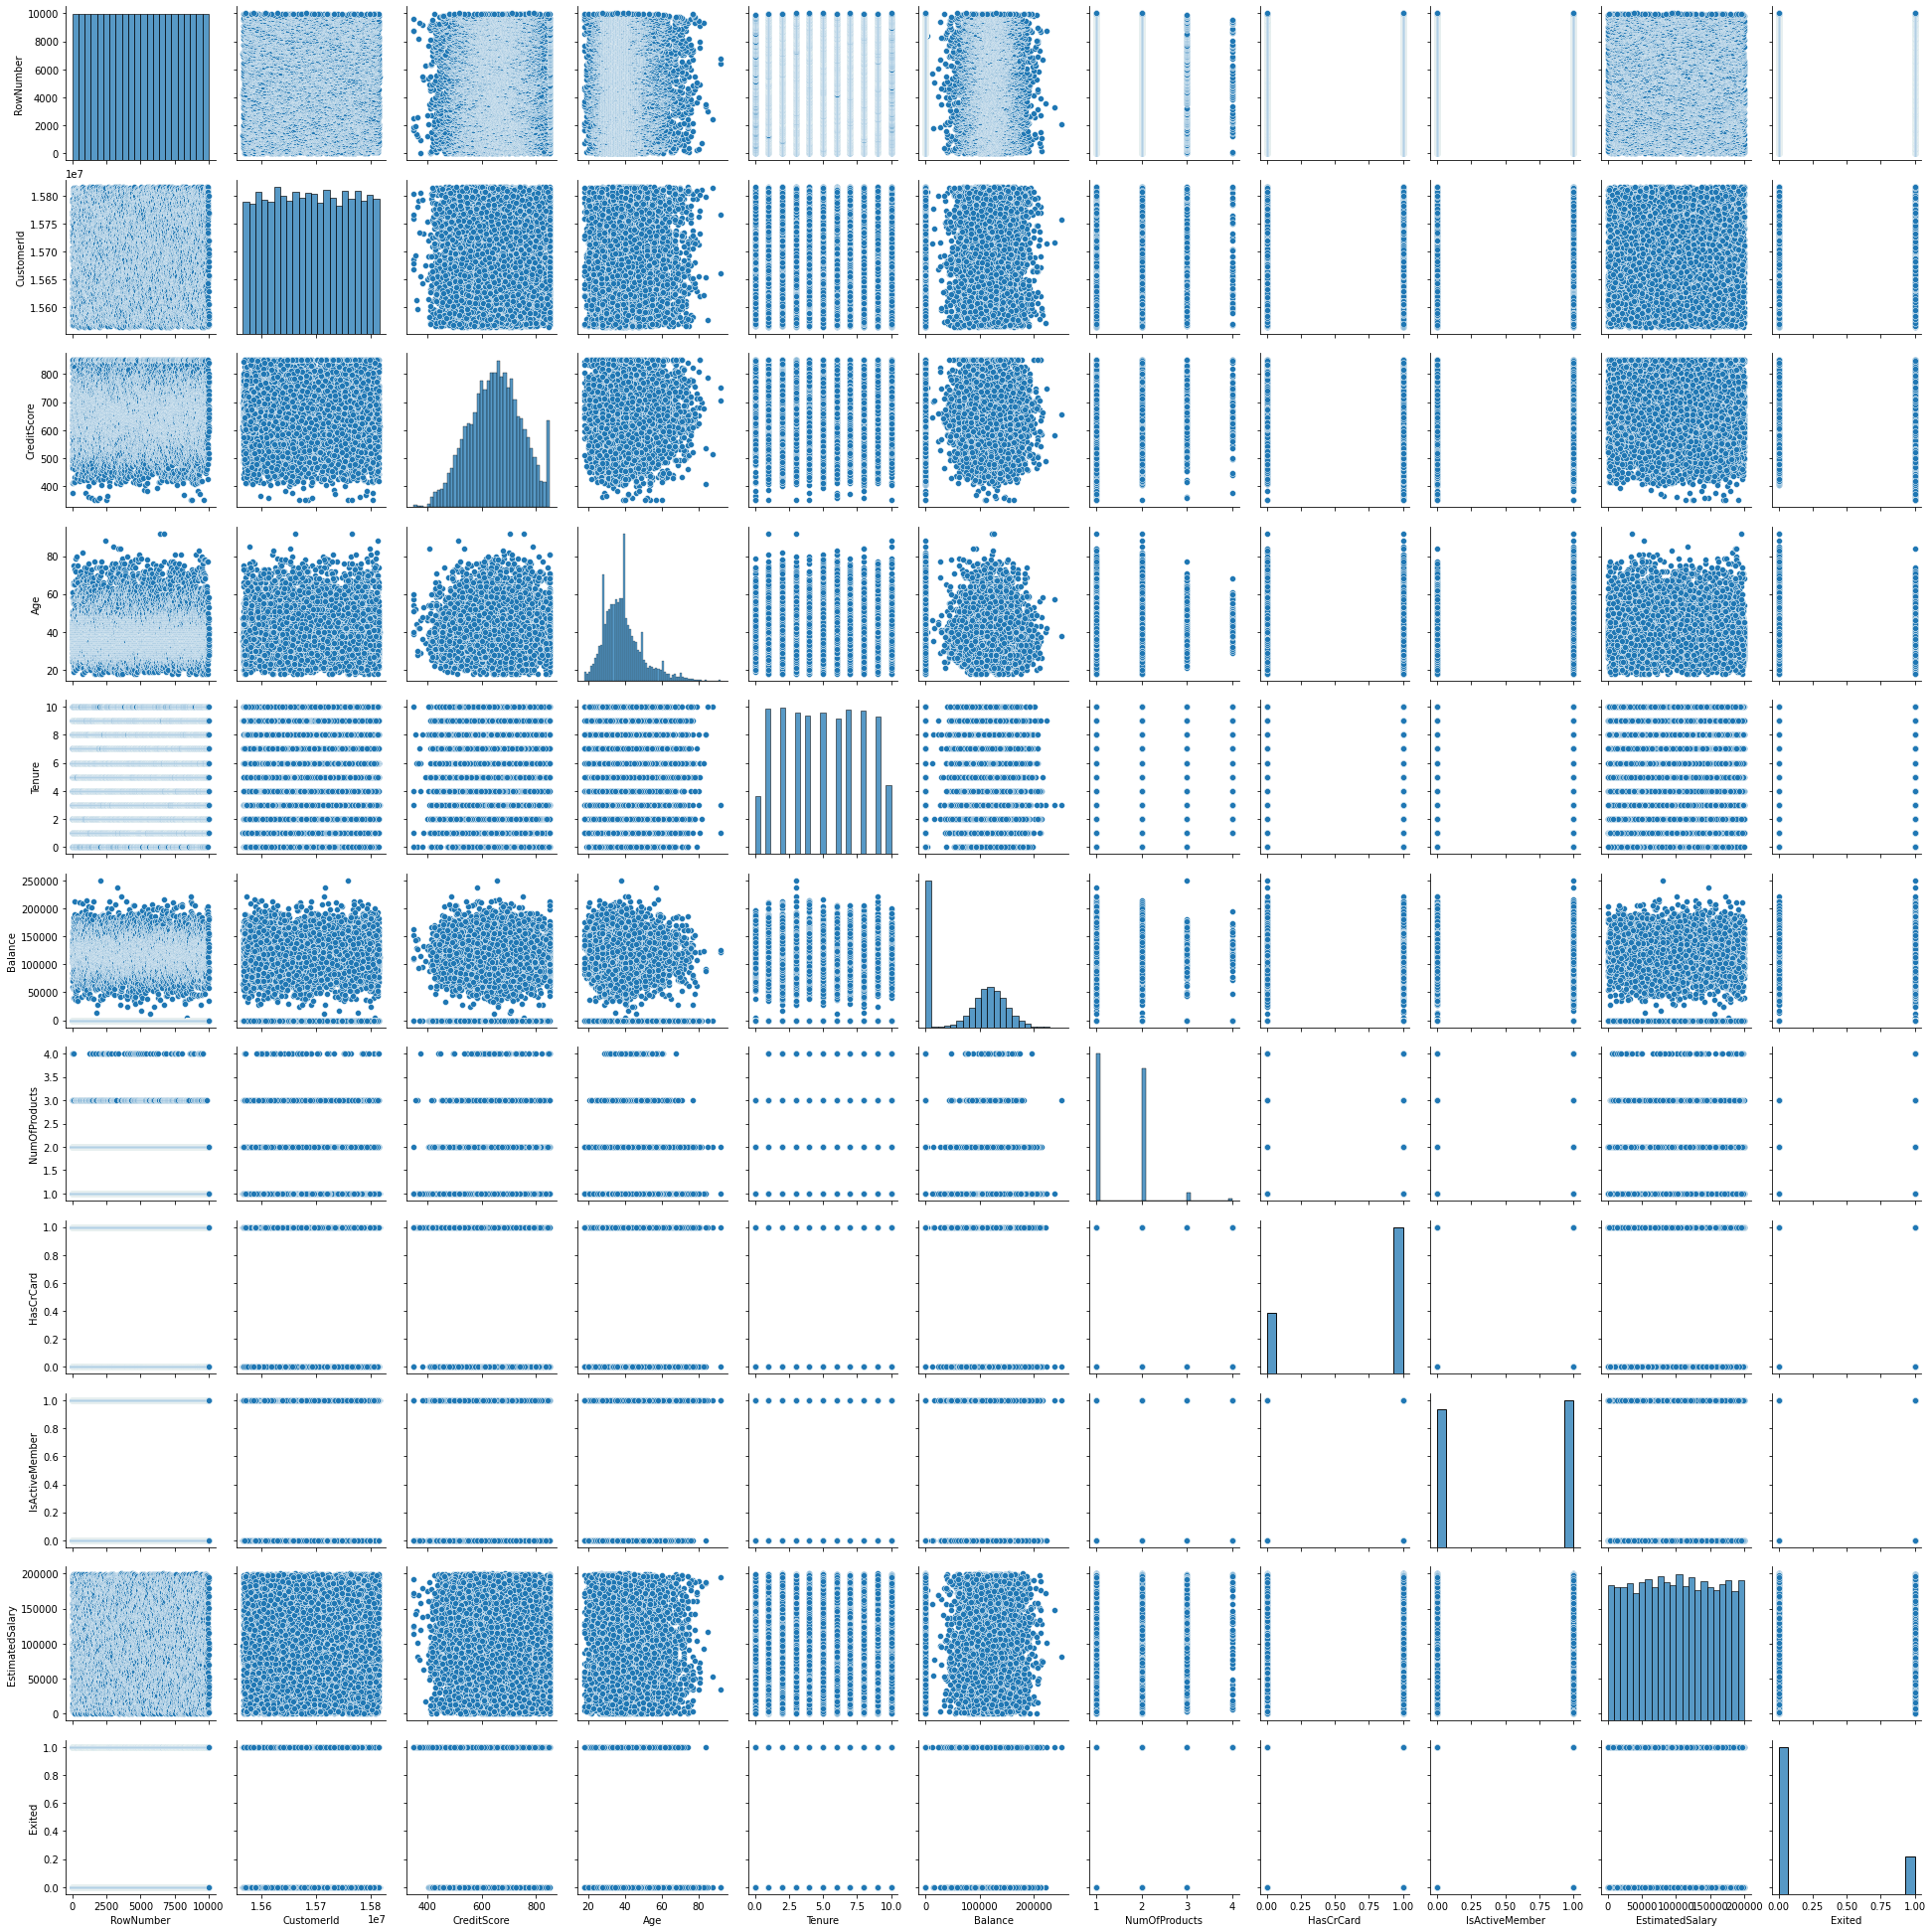

In [8]:
sns.pairplot(df)

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

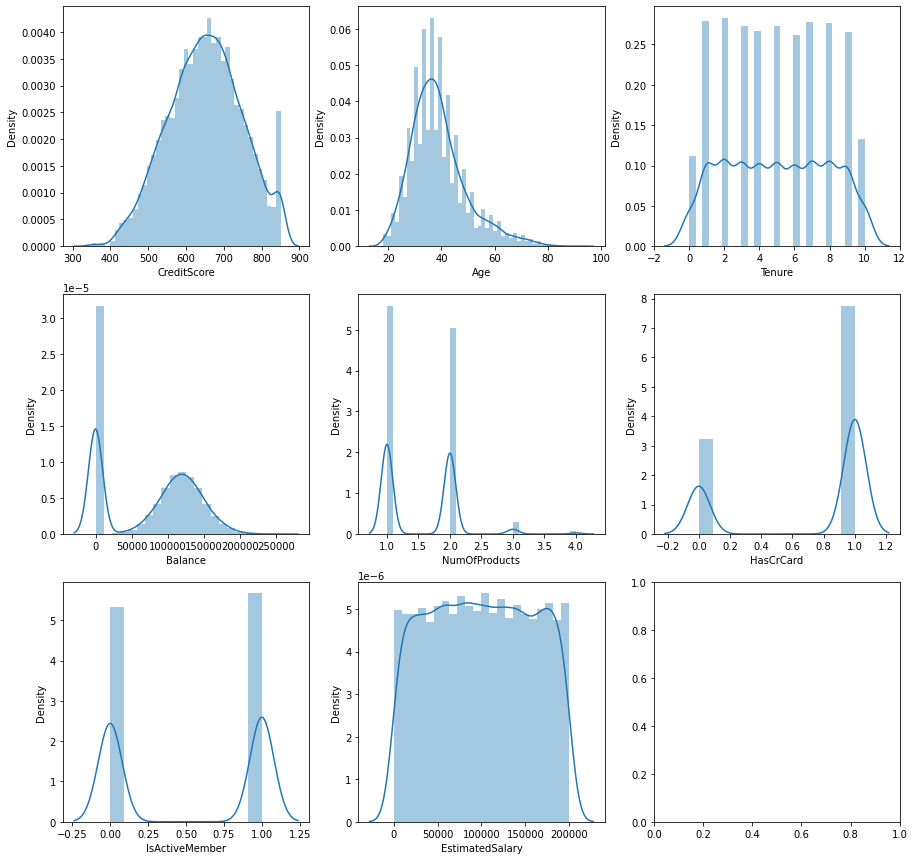

In [11]:
cols = df.drop(['Surname', 'Geography', 'Gender', 'Exited'], axis=1).columns
f, axes = plt.subplots(3, 3, figsize=(15,15))
axes=axes.ravel()
for i,col in enumerate(cols):
    plot = sns.distplot(df[col], ax=axes[i])

In [12]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



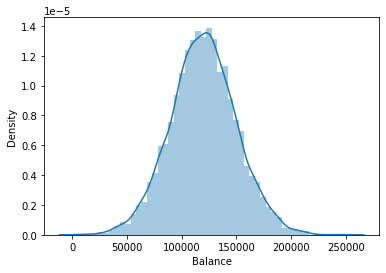

In [13]:
sns.distplot(df[df['Balance'] != 0]['Balance'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



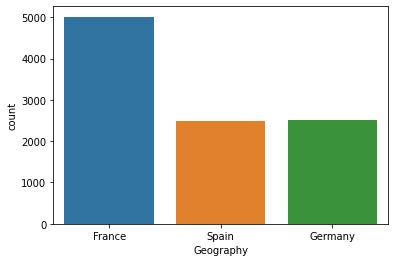

In [14]:
sns.countplot(df['Geography'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



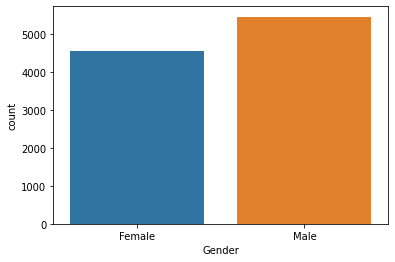

In [15]:
sns.countplot(df['Gender'])

In [16]:
df['Surname'].nunique()

2932

In [17]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [18]:
df['Surname'].value_counts()[df['Surname'].value_counts() > 1]

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Ruiz         2
Randall      2
Elliott      2
Kryukova     2
Hicks        2
Name: Surname, Length: 1374, dtype: int64

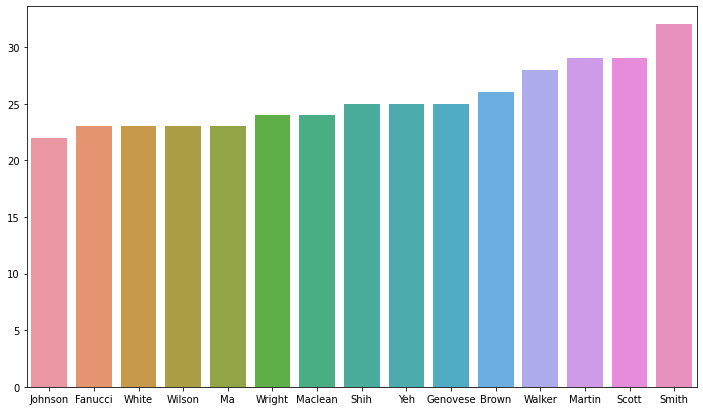

In [19]:
SurnameCount = df['Surname'].value_counts()\
              [df['Surname'].value_counts() > 1].head(15)[::-1]
plt.figure(figsize=(12,7))
sns.barplot(x=SurnameCount.index, 
            y=SurnameCount.values)

In [20]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


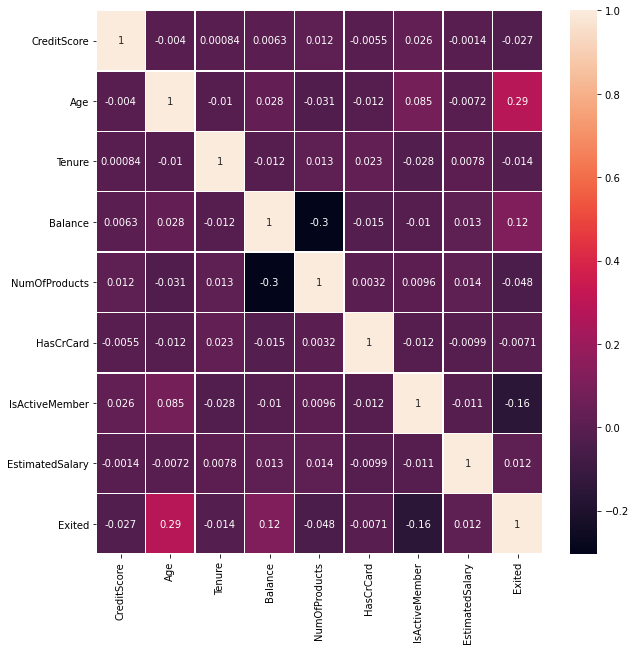

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linecolor='white', linewidths=0.5 )

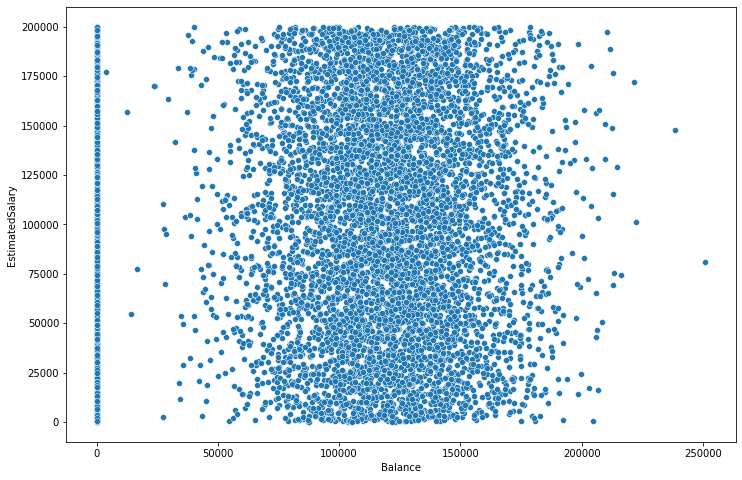

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Balance', y='EstimatedSalary', data=df)

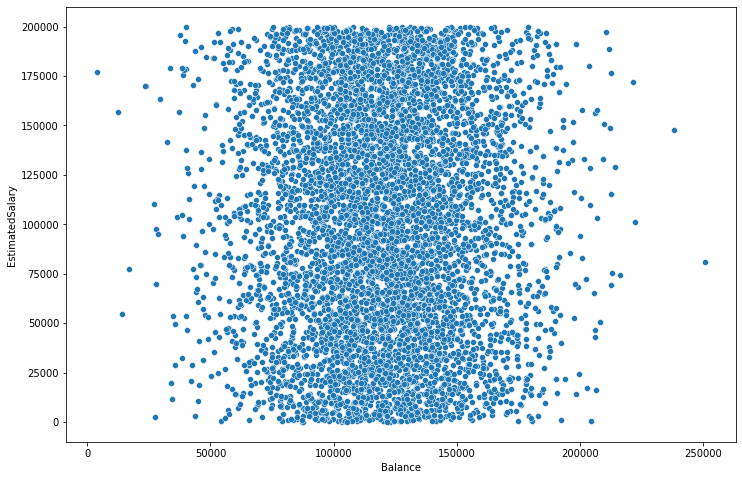

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Balance', y='EstimatedSalary', 
                data=df[df['Balance'] > 0])

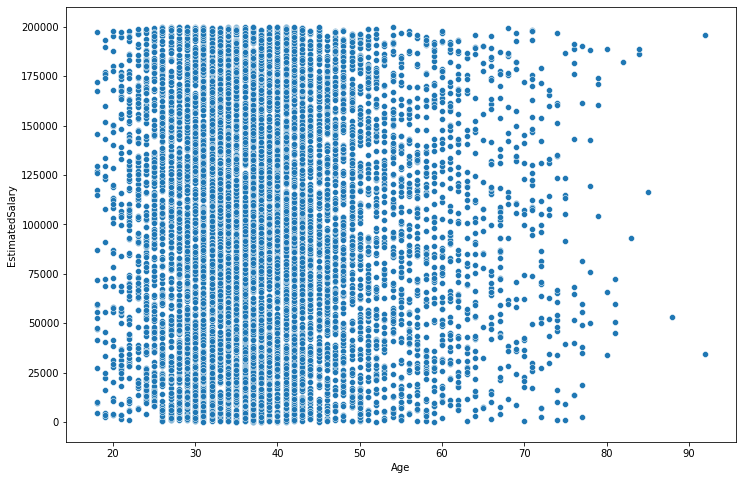

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age', y='EstimatedSalary', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



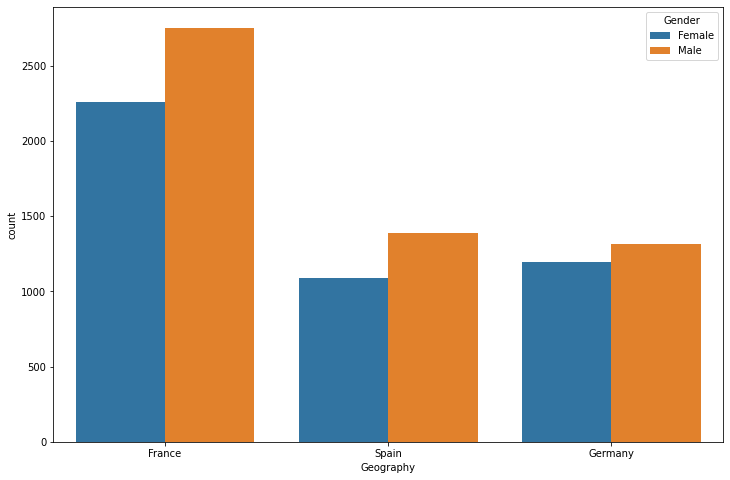

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(df['Geography'], hue=df['Gender'])

In [26]:
df.groupby(['Geography','Gender']).count()

Surname  CreditScore  ...  EstimatedSalary  Exited
Geography Gender                        ...                         
France    Female     2261         2261  ...             2261    2261
          Male       2753         2753  ...             2753    2753
Germany   Female     1193         1193  ...             1193    1193
          Male       1316         1316  ...             1316    1316
Spain     Female     1089         1089  ...             1089    1089
          Male       1388         1388  ...             1388    1388

[6 rows x 10 columns]

In [27]:
df['Exited'].mean()*100

20.369999999999997

In [28]:
churn_geo = df.groupby('Geography').sum()['Exited']
px.pie(churn_geo, values=churn_geo, names=churn_geo.index, 
       title='Churn by Geography')

In [29]:
px.bar(churn_geo, y=churn_geo, x=churn_geo.index, 
       title='Churn by Geography')

In [30]:
churn_geo2 = df.groupby('Geography').mean()['Exited']*100
print(churn_geo2)

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


In [31]:
px.pie(churn_geo2, values=churn_geo2, names=churn_geo2.index, 
       title='Churn by Geography')

In [35]:
import numpy as np

In [36]:
age_cat = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
df['Age_Group'] = pd.cut(df['Age'],
                         [0, 10, 20, 30, 40, 50, 60, 70, 80, np.Inf],
                         labels = age_cat,
                         include_lowest=True)

In [37]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50


In [38]:
px.histogram(df, x='Age_Group')

In [39]:
df18_27 = df[(df['Age'] >= 18) & (df['Age'] <= 27)]
df18_27mean = df18_27.groupby('Age').mean()
df18_27mean

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,
18,686.681818,4.818182,79169.575000,1.500000,0.636364,0.590909,85102.389545,0.090909
19,665.629630,5.074074,70502.539630,1.370370,0.814815,0.555556,97734.100370,0.037037
20,665.050000,5.075000,76038.890000,1.550000,0.650000,0.475000,97705.542000,0.050000
21,647.283019,4.773585,75926.882830,1.660377,0.716981,0.603774,102536.673774,0.056604
22,636.547619,5.678571,68213.748810,1.523810,0.690476,0.547619,98321.615476,0.142857
23,657.777778,5.414141,78528.569899,1.525253,0.676768,0.454545,110148.368485,0.060606
24,653.704545,5.030303,72824.278182,1.507576,0.689394,0.522727,107179.807424,0.106061
25,642.818182,5.155844,78282.264740,1.616883,0.714286,0.545455,98793.466688,0.038961
26,648.785000,4.985000,79573.747450,1.515000,0.695000,0.505000,102439.511500,0.070000


In [40]:
px.scatter(df18_27mean, x=df18_27mean.index, 
           y='EstimatedSalary',size='Balance',
           color='CreditScore')

In [41]:
Num_churn = df.groupby('NumOfProducts').mean()['Exited']*100
px.bar(Num_churn, x=Num_churn.index, y=Num_churn,
      labels={'y':'%Churn'}, title='%Churn by NumOfProducts')

In [42]:
Gender_churn = df.groupby('Gender').mean()['Exited']*100
px.bar(Gender_churn, x=Gender_churn.index, y=Gender_churn,
      labels={'y':'%Churn'}, title='%Churn by Gender')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x.

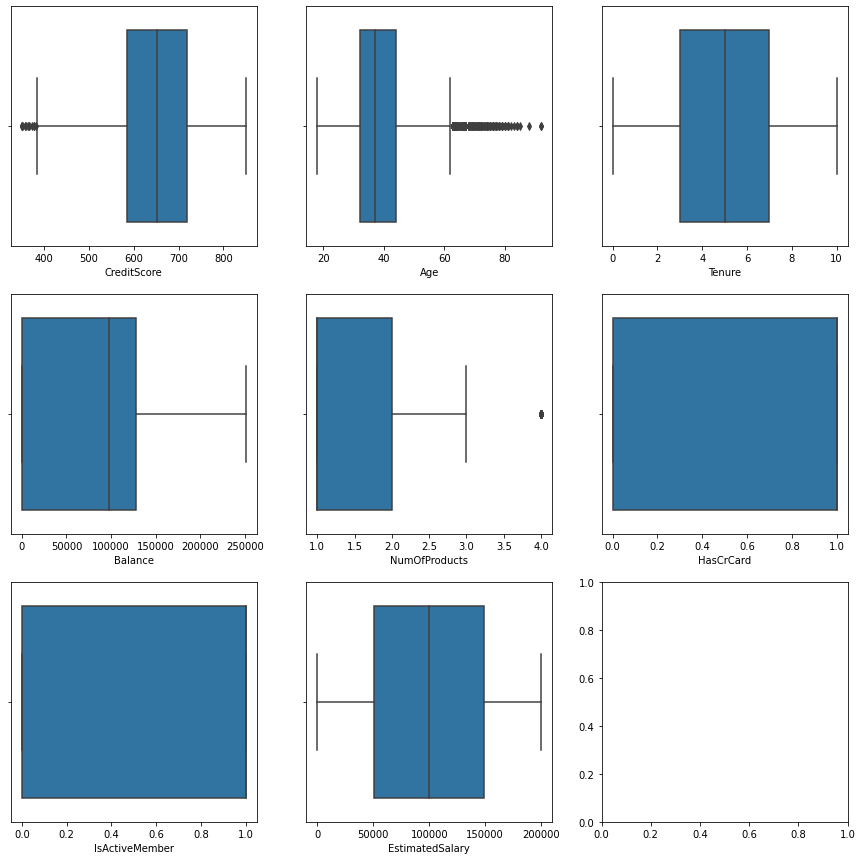

In [43]:
cols2 = df.drop(['Surname', 'Geography', 'Gender', 'Exited','Age_Group'], axis=1).columns
f, axes = plt.subplots(3, 3, figsize=(15,15))
axes=axes.ravel()
for i,col in enumerate(cols2):
    plot = sns.boxplot(df[col], ax=axes[i], orient='v')

In [44]:
for i in ['CreditScore', 'Age', 'NumOfProducts']:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    upper_fence = q3 + 1.5*(q3-q1)
    lower_fence = q1 - 1.5*(q3-q1)
    df[i] = [upper_fence if x > q3 else (lower_fence if x < q1 else x) for x in df[i]]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x.

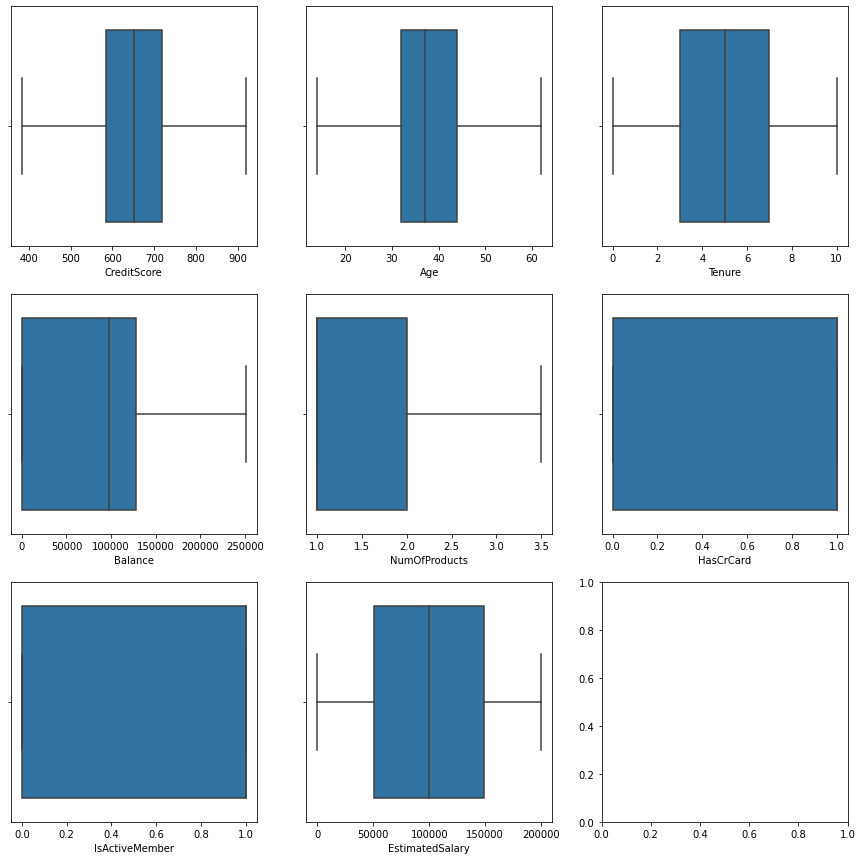

In [45]:
cols2 = df.drop(['Surname', 'Geography', 'Gender', 'Exited','Age_Group'], axis=1).columns
f, axes = plt.subplots(3, 3, figsize=(15,15))
axes=axes.ravel()
for i,col in enumerate(cols2):
    plot = sns.boxplot(df[col], ax=axes[i], orient='v')

In [46]:
df.rename(columns={'Exited':'churn'},inplace=True)

In [47]:
df.drop('Surname', axis=1, inplace=True)

In [48]:
df_dummies = pd.get_dummies(df.drop('Age_Group', axis=1), drop_first=True)

In [49]:

df_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2,0.00,1.0,1,1,101348.88,1,0,0,0
1,608.0,41.0,1,83807.86,1.0,0,1,112542.58,0,0,1,0
2,383.0,42.0,8,159660.80,3.5,1,0,113931.57,1,0,0,0
3,699.0,39.0,1,0.00,2.0,0,0,93826.63,0,0,0,0
4,919.0,43.0,2,125510.82,1.0,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,919.0,39.0,5,0.00,2.0,1,0,96270.64,0,0,0,1
9996,383.0,35.0,10,57369.61,1.0,1,1,101699.77,0,0,0,1
9997,709.0,36.0,7,0.00,1.0,0,1,42085.58,1,0,0,0
9998,919.0,42.0,3,75075.31,2.0,1,0,92888.52,1,1,0,1


In [50]:
X_train, X_test, y_train, y_test = train_test_split\
                                   (df_dummies.drop('churn', axis=1),
                                    df_dummies['churn'], test_size=0.2,
                                    random_state=111)

In [51]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
lr_pred = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



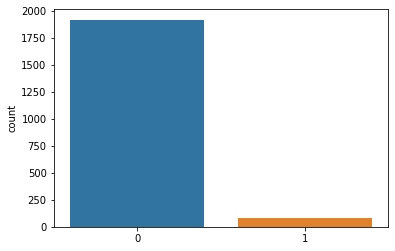

In [53]:
sns.countplot(lr_pred)

In [54]:
confusion_matrix(y_test,lr_pred)

array([[1553,   39],
       [ 367,   41]])

In [55]:
print('Accuracy = ', accuracy_score(y_test, lr_pred))
print('F1-Score = ', f1_score(y_test, lr_pred))
print('Precision = ', precision_score(y_test, lr_pred))
print('Recall = ', recall_score(y_test, lr_pred))

Accuracy =  0.797
F1-Score =  0.16803278688524592
Precision =  0.5125
Recall =  0.10049019607843138


In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
knn_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



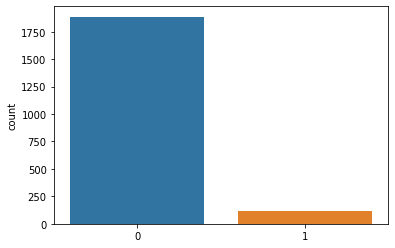

In [58]:
sns.countplot(knn_pred)

In [59]:
confusion_matrix(y_test, knn_pred)

array([[1509,   83],
       [ 378,   30]])

In [60]:
print('Accuracy = ', accuracy_score(y_test, knn_pred))
print('F1-Score = ', f1_score(y_test, knn_pred))
print('Precision = ', precision_score(y_test, knn_pred))
print('Recall = ', recall_score(y_test, knn_pred))

Accuracy =  0.7695
F1-Score =  0.11516314779270634
Precision =  0.26548672566371684
Recall =  0.07352941176470588


In [61]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
svm_pred = svm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



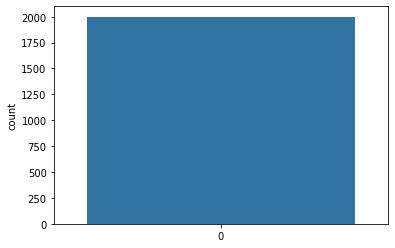

In [63]:
sns.countplot(svm_pred)

In [64]:
confusion_matrix(y_test, svm_pred)

array([[1592,    0],
       [ 408,    0]])

In [65]:
print('Accuracy = ', accuracy_score(y_test, svm_pred))
print('F1-Score = ', f1_score(y_test, svm_pred))
print('Precision = ', precision_score(y_test, svm_pred))
print('Recall = ', recall_score(y_test, svm_pred))

Accuracy =  0.796
F1-Score =  0.0
Precision =  0.0
Recall =  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [66]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
nb_pred = nb.predict(X_test)

In [68]:
confusion_matrix(y_test, nb_pred)

array([[1575,   17],
       [ 372,   36]])

In [69]:
print('Accuracy = ', accuracy_score(y_test, nb_pred))
print('F1-Score = ', f1_score(y_test, nb_pred))
print('Precision = ', precision_score(y_test, nb_pred))
print('Recall = ', recall_score(y_test, nb_pred))

Accuracy =  0.8055
F1-Score =  0.1561822125813449
Precision =  0.6792452830188679
Recall =  0.08823529411764706


In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
dt_pred = dt.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



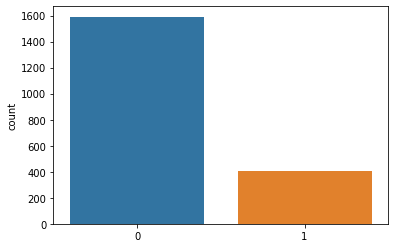

In [72]:
sns.countplot(dt_pred)

In [73]:
confusion_matrix(y_test, dt_pred)

array([[1392,  200],
       [ 199,  209]])

In [74]:
print('Accuracy = ', accuracy_score(y_test, dt_pred))
print('F1-Score = ', f1_score(y_test, dt_pred))
print('Precision = ', precision_score(y_test, dt_pred))
print('Recall = ', recall_score(y_test, dt_pred))

Accuracy =  0.8005
F1-Score =  0.5116279069767442
Precision =  0.511002444987775
Recall =  0.5122549019607843


In [75]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf_pred = rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



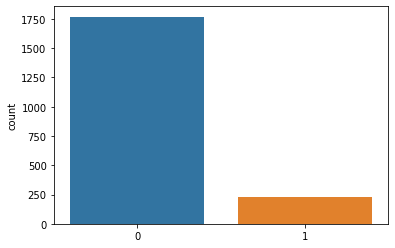

In [77]:
sns.countplot(rf_pred)

In [78]:
confusion_matrix(y_test, rf_pred)

array([[1541,   51],
       [ 227,  181]])

In [79]:
print('Accuracy = ', accuracy_score(y_test, rf_pred))
print('F1-Score = ', f1_score(y_test, rf_pred))
print('Precision = ', precision_score(y_test, rf_pred))
print('Recall = ', recall_score(y_test, rf_pred))

Accuracy =  0.861
F1-Score =  0.5656249999999999
Precision =  0.7801724137931034
Recall =  0.44362745098039214


In [80]:
comp_data = {'Models':['Logistic Regression', 'K-Nearest Neighbours', 
                      'Support Vector Machine', 'Naïve Bayes', 
                      'Decision Tree', 'Random Forest'],
            'Accuracy':[accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred), 
                        accuracy_score(y_test, svm_pred), accuracy_score(y_test, nb_pred), 
                        accuracy_score(y_test, dt_pred), accuracy_score(y_test, rf_pred)],
            'F1 score':[f1_score(y_test, lr_pred), f1_score(y_test, knn_pred),
                        f1_score(y_test, svm_pred), f1_score(y_test, nb_pred),
                        f1_score(y_test, dt_pred), f1_score(y_test, rf_pred)],
            'Recall':[precision_score(y_test, lr_pred), precision_score(y_test, knn_pred),
                      precision_score(y_test, svm_pred), precision_score(y_test, nb_pred),
                      precision_score(y_test, dt_pred), precision_score(y_test, rf_pred)],
            'Precision':[recall_score(y_test, lr_pred), recall_score(y_test, knn_pred),
                         recall_score(y_test, svm_pred), recall_score(y_test, nb_pred),
                         recall_score(y_test, dt_pred), recall_score(y_test, rf_pred)]}

compare = pd.DataFrame(comp_data)
compare

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Models,Accuracy,F1 score,Recall,Precision
0,Logistic Regression,0.7970,0.168033,0.512500,0.100490
1,K-Nearest Neighbours,0.7695,0.115163,0.265487,0.073529
2,Support Vector Machine,0.7960,0.000000,0.000000,0.000000
3,Naïve Bayes,0.8055,0.156182,0.679245,0.088235
4,Decision Tree,0.8005,0.511628,0.511002,0.512255
5,Random Forest,0.8610,0.565625,0.780172,0.443627


In [81]:
for i in compare.drop('Models', axis=1).columns:
    fig = px.bar(compare, x='Models', y=i, title=i+' Comparison')
    fig.show()


In [82]:
min_max_scaler1 = MinMaxScaler()
min_max_scaler2 = MinMaxScaler()

minmax1 = min_max_scaler1.fit_transform(X_train)
minmax2 = min_max_scaler2.fit_transform(X_test)

X_n_train = pd.DataFrame(minmax1, columns=df_dummies.columns[:-1])
X_n_test = pd.DataFrame(minmax2, columns=df_dummies.columns[:-1])

In [83]:
svm_n = SVC()
svm_n.fit(X_n_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
svm_n_pred = svm_n.predict(X_n_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



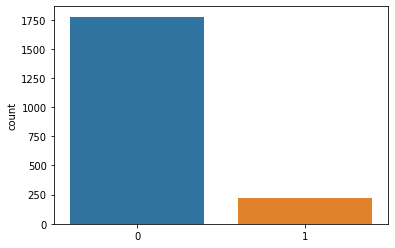

In [85]:
sns.countplot(svm_n_pred)

In [86]:
confusion_matrix(y_test, svm_n_pred)

array([[1535,   57],
       [ 241,  167]])

In [87]:
print('Accuracy = ', accuracy_score(y_test, svm_n_pred))
print('F1-Score = ', f1_score(y_test, svm_n_pred))
print('Precision = ', precision_score(y_test, svm_n_pred))
print('Recall = ', recall_score(y_test, svm_n_pred))

Accuracy =  0.851
F1-Score =  0.5284810126582278
Precision =  0.7455357142857143
Recall =  0.40931372549019607


In [88]:
svm_param = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'gamma':[0.01, 0.1, 1, 10, 100, 1000]}
svm_grid = GridSearchCV(SVC(), svm_param, verbose=3)
svm_grid.fit(X_n_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.01, gamma=0.01 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=0.01, gamma=0.01, score=0.797, total=   1.0s
[CV] C=0.01, gamma=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................. C=0.01, gamma=0.01, score=0.796, total=   0.9s
[CV] C=0.01, gamma=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .................. C=0.01, gamma=0.01, score=0.796, total=   0.9s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.796, total=   0.9s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.796, total=   0.9s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.797, total=   1.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.796, total=   1.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.796, total=   1.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.796, total=   1.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  6.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [89]:
svm_grid_pred = svm_grid.predict(X_n_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



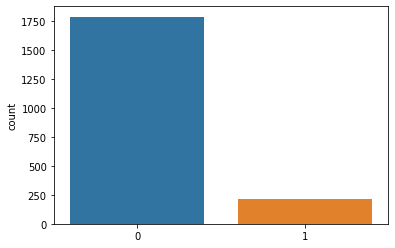

In [90]:
sns.countplot(svm_grid_pred)

In [91]:
confusion_matrix(y_test, svm_grid_pred)

array([[1540,   52],
       [ 246,  162]])

In [92]:
print('Accuracy = ', accuracy_score(y_test, svm_grid_pred))
print('F1-Score = ', f1_score(y_test, svm_grid_pred))
print('Precision = ', precision_score(y_test, svm_grid_pred))
print('Recall = ', recall_score(y_test, svm_grid_pred))

Accuracy =  0.851
F1-Score =  0.5209003215434084
Precision =  0.7570093457943925
Recall =  0.39705882352941174


In [93]:
rf_param = {'max_depth' : [4, 8, 16, 32, 64, 128, 256], 
            'min_samples_leaf' : [1, 2, 4, 8, 12, 16, 20],
            'n_estimators' : [10, 20, 50, 100, 300, 500]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, verbose=3)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.859, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.843, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.828, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.838, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.828, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.852, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.843, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.842, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.844, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.833, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=0.836, total= 

[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed: 23.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [94]:
rf_grid_pred = rf_grid.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



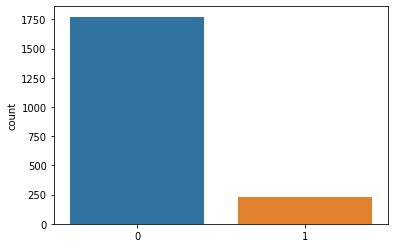

In [95]:
sns.countplot(rf_grid_pred)

In [96]:
print('Accuracy = ', accuracy_score(y_test, rf_grid_pred))
print('F1-Score = ', f1_score(y_test, rf_grid_pred))
print('Precision = ', precision_score(y_test, rf_grid_pred))
print('Recall = ', recall_score(y_test, rf_grid_pred))

Accuracy =  0.8615
F1-Score =  0.5637795275590551
Precision =  0.788546255506608
Recall =  0.4387254901960784


In [97]:
comp_data2 = {'Models':['LR', 'KNN', 
                      'SVM', 'NB', 
                      'DT', 'RF',
                      'SVM with Norm',
                      'SVM with Grid',
                      'RF with Grid'],
            'Accuracy':[accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred), 
                        accuracy_score(y_test, svm_pred), accuracy_score(y_test, nb_pred), 
                        accuracy_score(y_test, dt_pred), accuracy_score(y_test, rf_pred),
                        accuracy_score(y_test, svm_n_pred), 
                        accuracy_score(y_test, svm_grid_pred),
                        accuracy_score(y_test, rf_grid_pred)],
            'F1 score':[f1_score(y_test, lr_pred), f1_score(y_test, knn_pred),
                        f1_score(y_test, svm_pred), f1_score(y_test, nb_pred),
                        f1_score(y_test, dt_pred), f1_score(y_test, rf_pred),
                        f1_score(y_test, svm_n_pred), f1_score(y_test, svm_grid_pred),
                        f1_score(y_test, rf_grid_pred)],
            'Recall':[precision_score(y_test, lr_pred), precision_score(y_test, knn_pred),
                      precision_score(y_test, svm_pred), precision_score(y_test, nb_pred),
                      precision_score(y_test, dt_pred), precision_score(y_test, rf_pred),
                      precision_score(y_test, svm_n_pred), 
                      precision_score(y_test, svm_grid_pred),
                      precision_score(y_test, rf_grid_pred)],
            'Precision':[recall_score(y_test, lr_pred), recall_score(y_test, knn_pred),
                         recall_score(y_test, svm_pred), recall_score(y_test, nb_pred),
                         recall_score(y_test, dt_pred), recall_score(y_test, rf_pred),
                         recall_score(y_test, svm_n_pred), 
                         recall_score(y_test, svm_grid_pred),
                         recall_score(y_test, rf_grid_pred)]}

compare2 = pd.DataFrame(comp_data2)
compare2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Models,Accuracy,F1 score,Recall,Precision
0,LR,0.7970,0.168033,0.512500,0.100490
1,KNN,0.7695,0.115163,0.265487,0.073529
2,SVM,0.7960,0.000000,0.000000,0.000000
3,NB,0.8055,0.156182,0.679245,0.088235
4,DT,0.8005,0.511628,0.511002,0.512255
5,RF,0.8610,0.565625,0.780172,0.443627
6,SVM with Norm,0.8510,0.528481,0.745536,0.409314
7,SVM with Grid,0.8510,0.520900,0.757009,0.397059
8,RF with Grid,0.8615,0.563780,0.788546,0.438725


In [98]:
for i in compare2.drop('Models', axis=1).columns:
    fig = px.bar(compare2, x='Models', y=i, title=i+' Comparison')
    fig.show()